In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import time
import sys
import glob

In [2]:
data = pd.read_csv("./files_for_lab/csv_files/marketing_customer_analysis.csv")

In [3]:
# Shape of dataframe
print("The shape of the dataframe is:", data.shape)

# Drop the weird column
data = data.drop(columns="Unnamed: 0")

# Lowercase column headers
data.columns = [col.lower() for col in data.columns]

The shape of the dataframe is: (10910, 26)


In [4]:
# Display only columns with numerical values
numerical_cols = data.select_dtypes(include=[np.number]).columns
print("Numerical columns:")
print(numerical_cols)

# Display only columns with categorical values
categorical_cols = data.select_dtypes(exclude=[np.number]).columns
print("Categorical columns:")
print(categorical_cols)

Numerical columns:
Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')
Categorical columns:
Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')


In [5]:
# Counting NaN
print("Number of NaN values in the dataframe:", data.isnull().sum().sum())

Number of NaN values in the dataframe: 9254


In [6]:
# Displaying percentage of NaN values in the dataframe
percentage_nan = data.isnull().mean().mean() * 100
print("Percentage of NaN values in the dataframe: {:.2f}%".format(percentage_nan))

Percentage of NaN values in the dataframe: 3.39%


In [7]:
# Looking for duplicates
print("Number of duplicates in the dataframe:", data.duplicated().sum())

# Dropping duplicates
data = data.drop_duplicates()

# Checking again for duplicates
print("Number of duplicates after dropping:", data.duplicated().sum())

Number of duplicates in the dataframe: 37
Number of duplicates after dropping: 0


In [8]:
# Checking whether the NaN values are in the same row: response and state
nan_rows = data[data['state'].isnull()].index
print("The NaN values are in the same row for response and state:", all(nan_rows == data[data['response'].isnull()].index))

# Saving the index of NaN values to a variable
nan_idx = data[data.isnull().any(axis=1)].index

The NaN values are in the same row for response and state: True


In [9]:
# just counting unique values to find the mode, if theres any
display(data["response"].value_counts(dropna=False))
display(data["state"].value_counts(dropna=False))

No     8795
Yes    1464
NaN     614
Name: response, dtype: int64

California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
NaN            614
Name: state, dtype: int64

In [10]:
# replacing nan values with mode, because adding around 5% to the mode value wont change much
data['state'] = data['state'].fillna("California")
display(data['state'].value_counts(dropna = False))
data['response'] = data['response'].fillna("No")
display(data['response'].value_counts(dropna = False))

California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: state, dtype: int64

No     9409
Yes    1464
Name: response, dtype: int64

In [11]:
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [12]:
# checking whether the nan are in the same row: months since last claim and number of open complaints
nan_rows = data[data['months since last claim'].isna() & data['number of open complaints'].isna()].index

#saving index of the nan values to a variable
nan_index = data[data['months since last claim'].isna() | data['number of open complaints'].isna()].index

# the variables will then be matched
if len(nan_rows) == len(nan_index):
    print("The nan values are in the same row")
else:
    print("False")

The nan values are in the same row


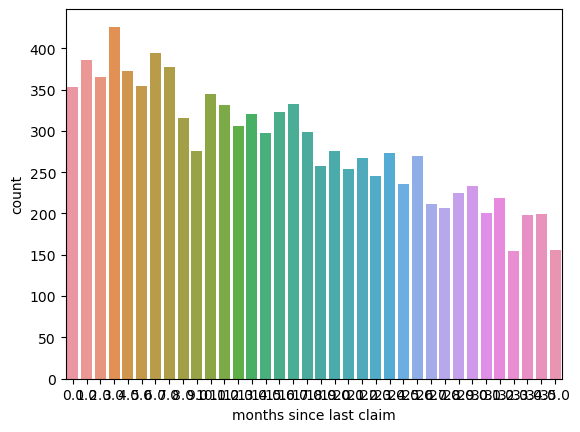

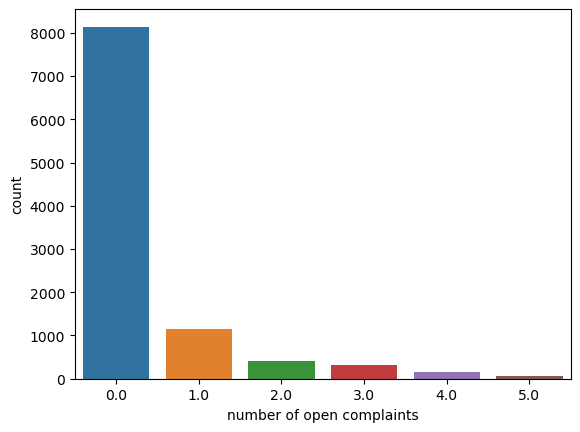

In [13]:
# checking the data distribution of the columns above
sns.countplot(x = data["months since last claim"])
plt.show()

sns.countplot(x = data["number of open complaints"])
plt.show()

In [14]:
# getting mean
mean_claim = data["months since last claim"].mean(skipna=True)
# getting median
median_complaints = data["months since last claim"].median(skipna=True)

In [15]:
# replacing nan values with mean, because the data looks evenly distributed
data['months since last claim'] = data['months since last claim'].fillna(mean_claim)
data['number of open complaints'] = data['number of open complaints'].fillna(median_complaints)

In [16]:
# check again
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [17]:
# Checking whether the NaN are in the same row vehicle class and vehicle size
nan_indices = data[data['vehicle class'].isnull() & data['vehicle size'].isnull()].index
if not nan_indices.empty:
    print("The NaN values of vehicle class and vehicle size are in the same rows.")
    nan_index_matches = True
else:
    print("The NaN values of vehicle class and vehicle size are NOT in the same rows.")
    nan_index_matches = False

The NaN values of vehicle class and vehicle size are in the same rows.


In [18]:
# replace any missing values in the "vehicle_class" column with the mode of the column, and similarly for the "vehicle_size" column
data["vehicle class"].fillna(data["vehicle class"].mode()[0], inplace=True)
data["vehicle size"].fillna(data["vehicle size"].mode()[0], inplace=True)

In [19]:
# recheking
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                       0
vehicle size                        0
vehicle type                     5465
dtype: int64

In [20]:
# checking the last column
data[["vehicle type"]].value_counts(dropna=False)

vehicle type
NaN             5465
A               5408
dtype: int64

In [21]:
# then fill the NaN with value
data['vehicle type'] = data['vehicle type'].fillna("not A")

In [22]:
# final check
data.isna().sum().sum()

0

In [23]:
# extracting months value from datetime column
data['effective to date'] = pd.to_datetime(data['effective to date'])
data['month'] = data['effective to date'].dt.month

# Round 3

In [24]:
# show dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10873 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10873 non-null  object        
 1   state                          10873 non-null  object        
 2   customer lifetime value        10873 non-null  float64       
 3   response                       10873 non-null  object        
 4   coverage                       10873 non-null  object        
 5   education                      10873 non-null  object        
 6   effective to date              10873 non-null  datetime64[ns]
 7   employmentstatus               10873 non-null  object        
 8   gender                         10873 non-null  object        
 9   income                         10873 non-null  int64         
 10  location code                  10873 non-null  object        
 11  marital status 

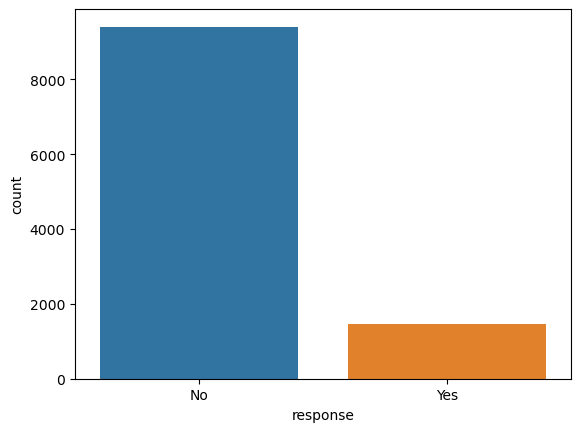

displaying countplot for response


In [25]:
# total number of response: countplot
sns.countplot(x = "response", data = data)
plt.show()
print("displaying countplot for response")

In [26]:
# adding numerical response to the dataframe
data ["response_num"] = data["response"].map(dict(Yes = 1, No = 0))
# checking the new column
data["response_num"].value_counts(dropna=False)

0    9409
1    1464
Name: response_num, dtype: int64

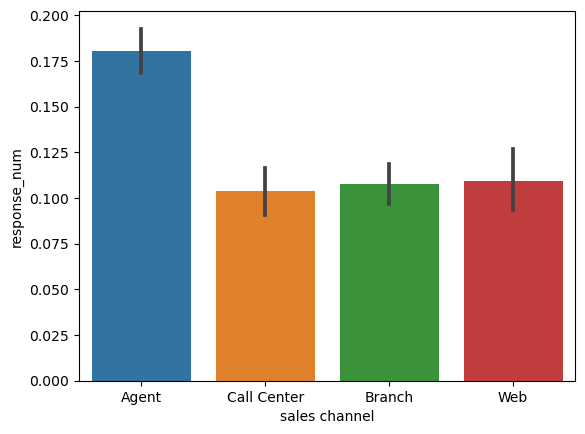

displaying barplot for sales channel


In [27]:
# showing a plot of response rate (num) by the sales channel
sns.barplot(y = "response_num", x = "sales channel", data = data)
plt.show()
print("displaying barplot for sales channel")

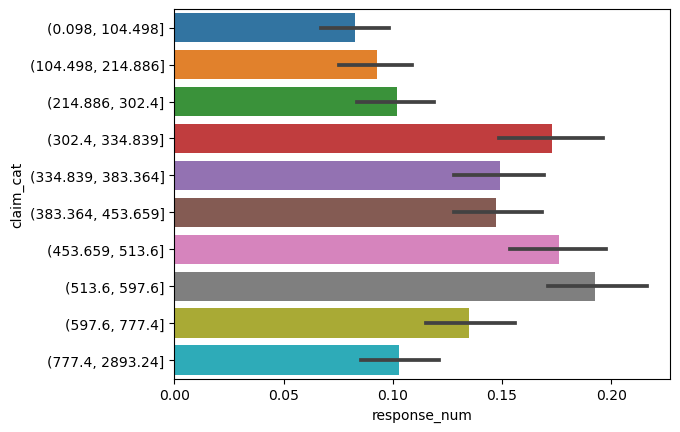

displaying barplot for total claim amount


In [28]:
# showing a plot of response rate by the total claim amount
# making the bins first (splitting claim values between intervals)
data['claim_cat'] = pd.qcut(data['total claim amount'], q=10)
sns.barplot(x = data["response_num"], y = data['claim_cat'])
plt.show()
print("displaying barplot for total claim amount")

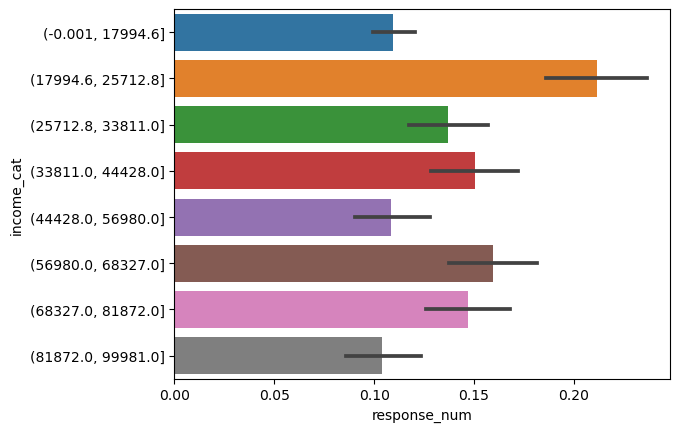

displaying barplot for income with bins


In [29]:
# same sweet, different story
data['income_cat'] = pd.qcut(data['income'], q=10, duplicates='drop')
sns.barplot(x = data["response_num"], y = data['income_cat'])
plt.show()
print("displaying barplot for income with bins")

# round 4

In [30]:
# Making numerical dataframe
numerical_data = data.select_dtypes(include=[np.number])

# Making categorical dataframe
categorical_data = data.select_dtypes(exclude=[np.number])

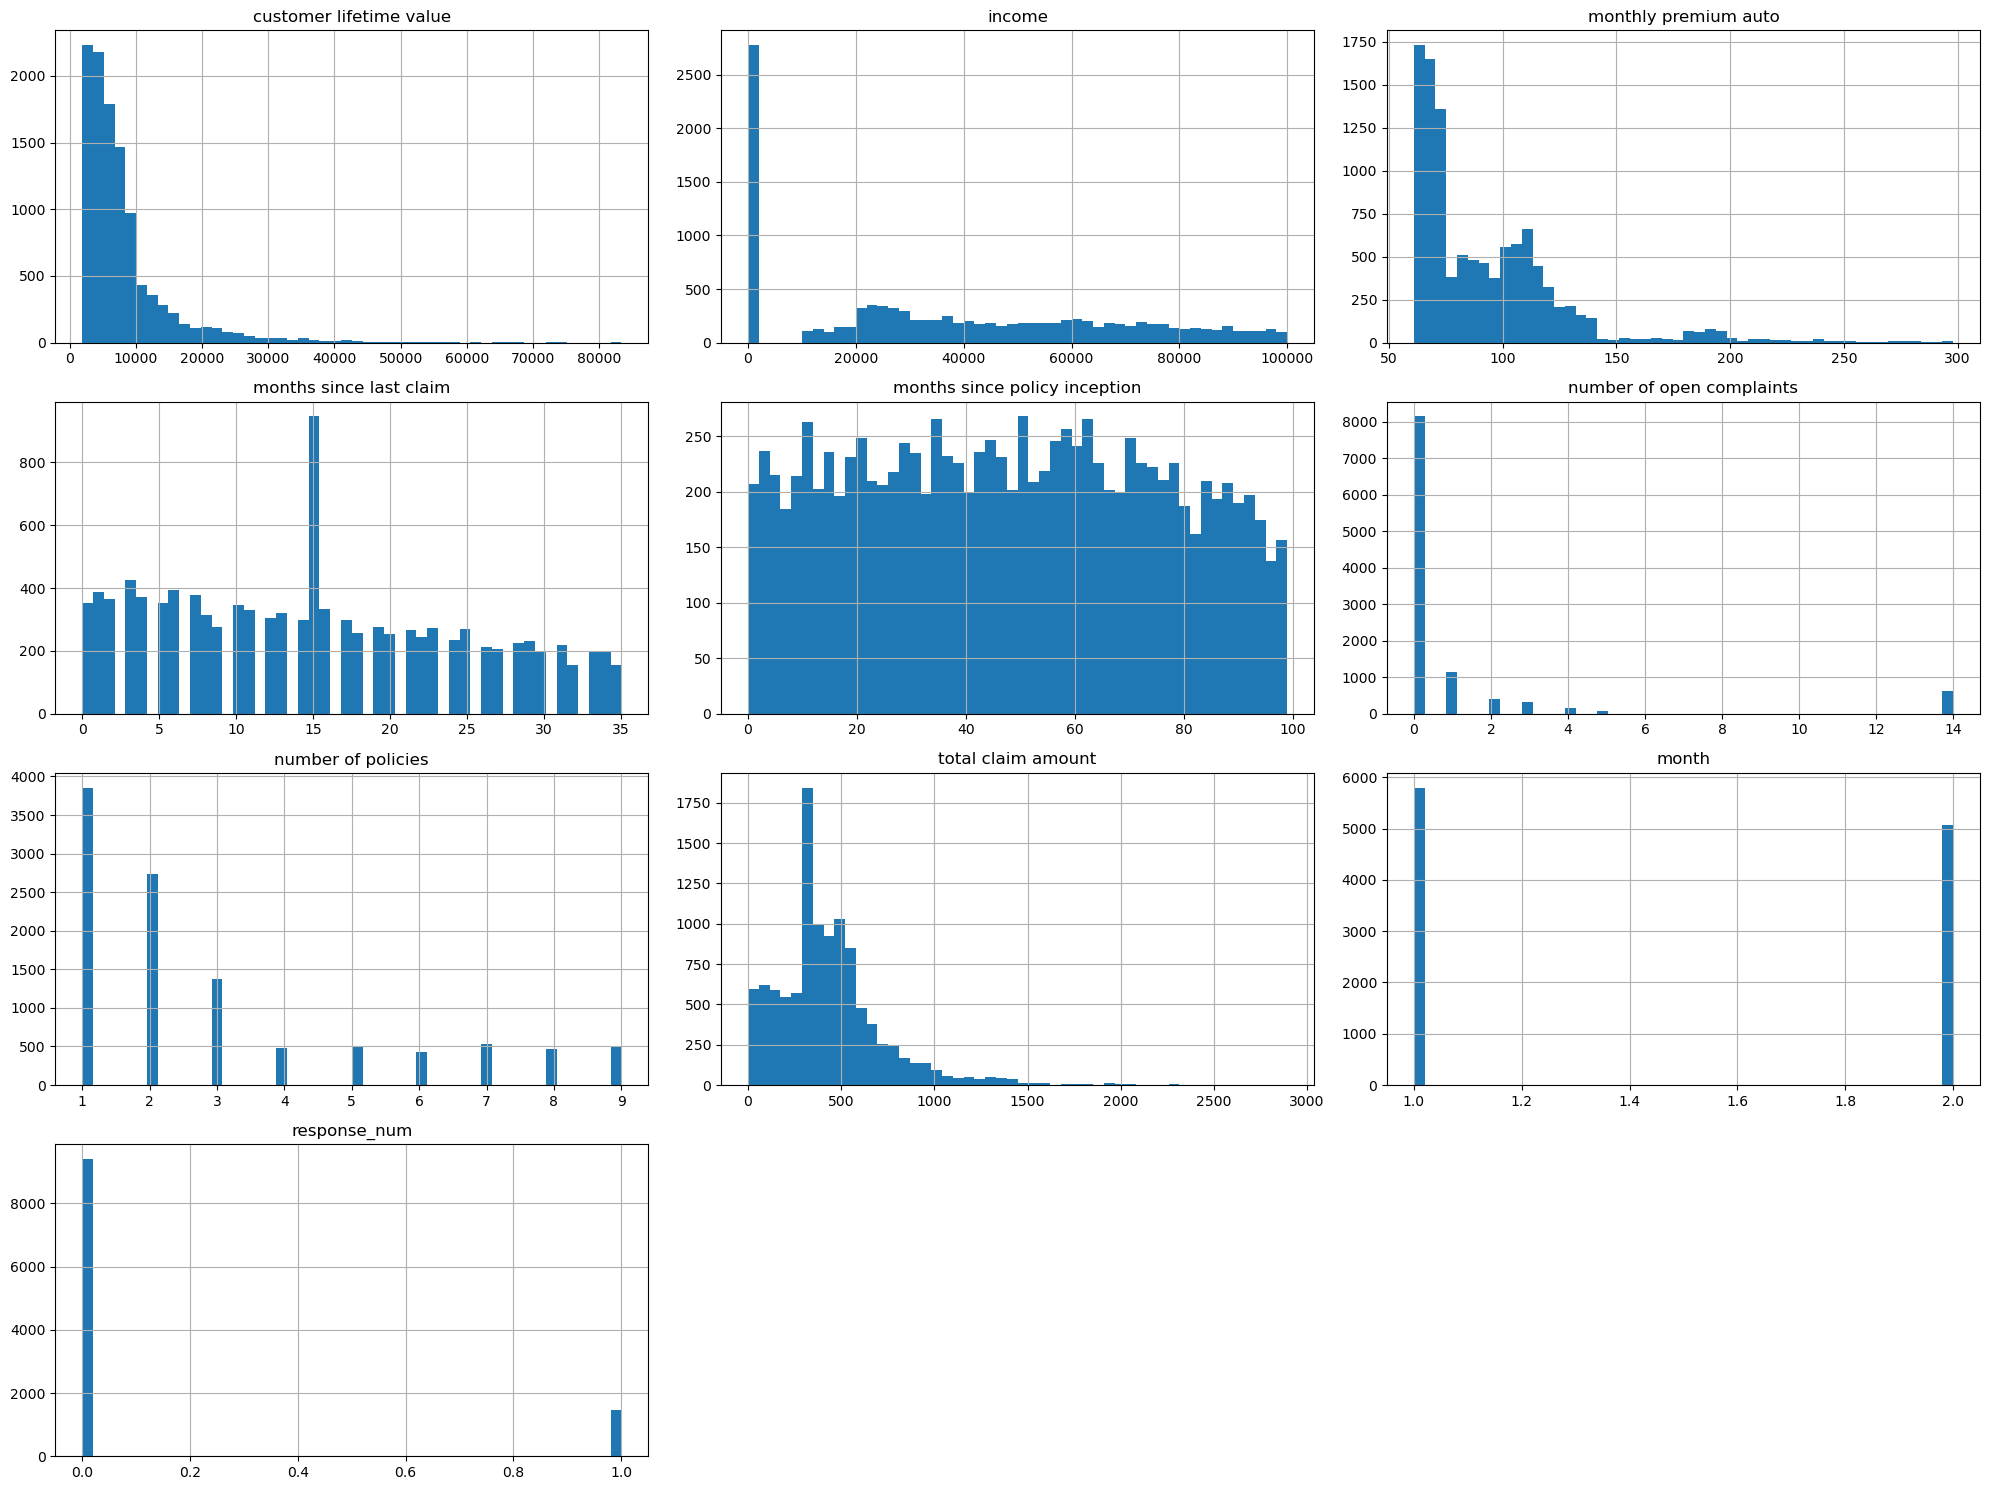

In [31]:
# Displaying histogram for every column in numerical
numerical_data.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


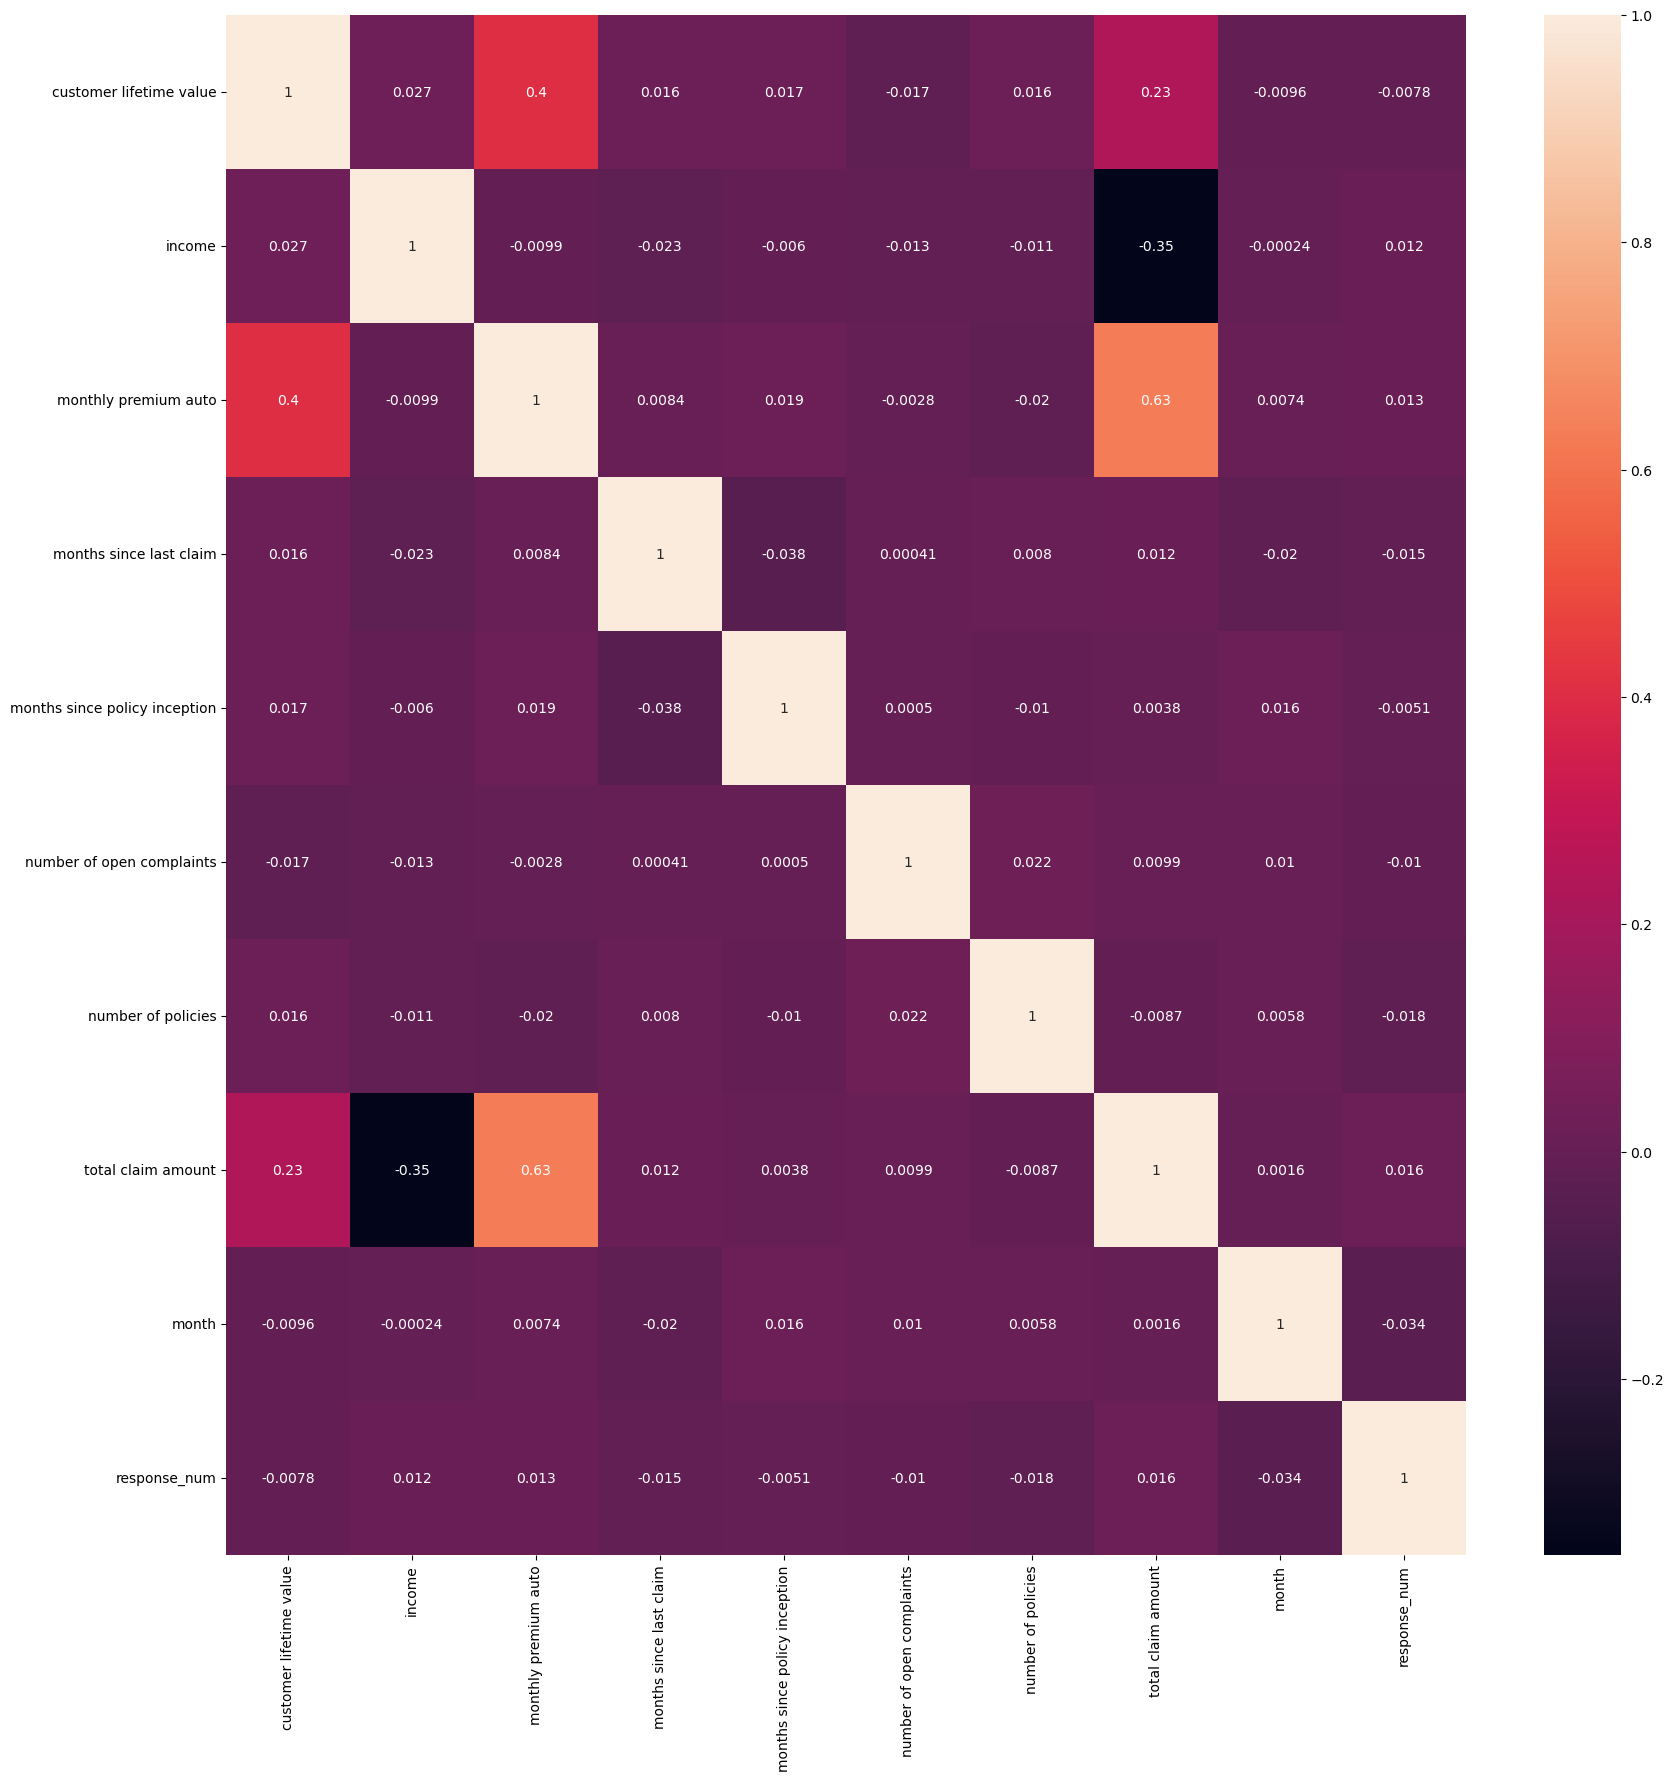

In [32]:
# Displaying heatmap and the matrix of the collinearity between the columns
plt.figure(figsize=(20,20))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()


# round 5

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
# Normalizing data
scaler = MinMaxScaler().fit(numerical_data)
x_normalized = scaler.transform(numerical_data)
x_normalized = pd.DataFrame(x_normalized, columns=numerical_data.columns)

In [35]:
x_normalized

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.101171,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.257445,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.165875,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.167263,0.0,1.0
4,0.087527,0.236795,0.236287,0.432716,0.313131,1.000000,0.750,0.244657,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10868,0.167823,0.000000,0.810127,0.432716,0.404040,1.000000,0.750,0.419717,0.0,0.0
10869,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.094333,0.0,0.0
10870,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,0.131763,1.0,0.0
10871,0.123717,0.642072,0.409283,0.000000,0.272727,0.285714,0.625,0.213674,1.0,0.0


# round 6

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
categorical_data = categorical_data.drop(['claim_cat', 'income_cat', 'effective to date', 'customer', 'response'], axis=1)

In [38]:
# One-hot encoding categorical data
encoder = OneHotEncoder(drop='first').fit(categorical_data)
onehot_encoded = encoder.transform(categorical_data).toarray()
onehot_encoded = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names(categorical_data.columns))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
onehot_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,vehicle type_not A
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10869,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10870,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10871,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [40]:
# Concatenating normalized numerical data and one-hot encoded categorical data
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.head(1)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,vehicle type_not A
0,0.035752,0.480381,0.0,0.2,0.525253,0.0,1.0,0.101171,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [41]:
# dropping irrelevant column(s)
try:
    X = X.drop(columns=["response_num","month"], axis = 1)
    print("deleted columns 'response_num', 'month'")
except:
    print("columns 'response_num', 'month' are already deleted.")

deleted columns 'response_num', 'month'


# round 7

In [42]:
# Splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop(["total claim amount"], axis = 1), X["total claim amount"], test_size=0.2, random_state=42)

# Training a linear regression model on the training data
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

# Making predictions on the testing data
y_pred = linear_reg.predict(X_test)

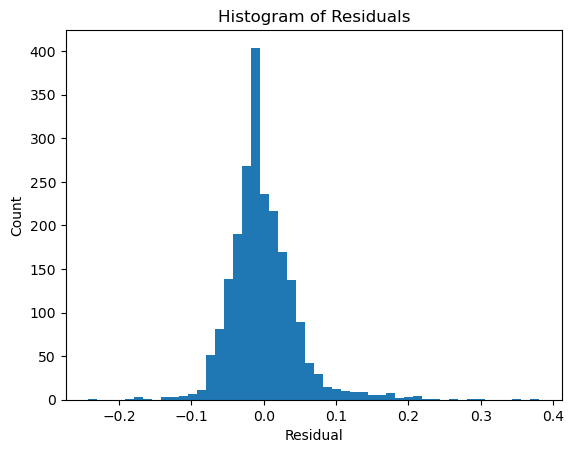

In [43]:
# Plotting the metrics
import matplotlib.pyplot as plt

# Plotting the residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Histogram of Residuals")
plt.show()

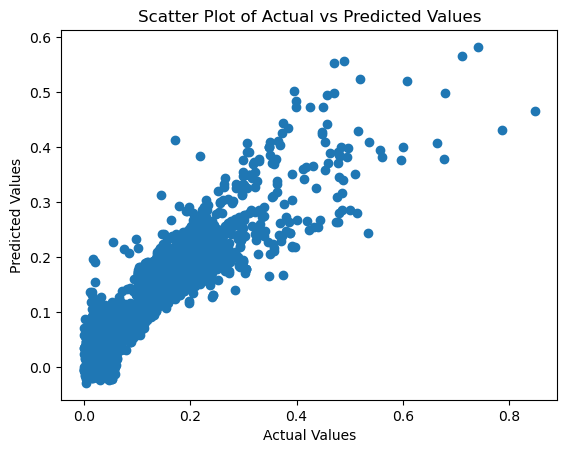

In [44]:
# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()

In [45]:
# Evaluating the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.002261993324560316
R2 Score:  0.7796338545926206
